In [3]:
# IMPORT TOOLS
import sys
import subprocess
import os
# sys.path.insert(1, f"{subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')}/logistics/tools")
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools  import image_to_thesis
image_to_thesis.pull_from_thesis()
# ------------

pull_from_thesis: Pulling from master-thesis repository
pull_from_thesis: Done


save: Saving neutron_yields.pdf to theory
pull_from_thesis: Pulling from master-thesis repository
pull_from_thesis: Done
push_to_thesis: Pushing to master-thesis repository
push_to_thesis: Done


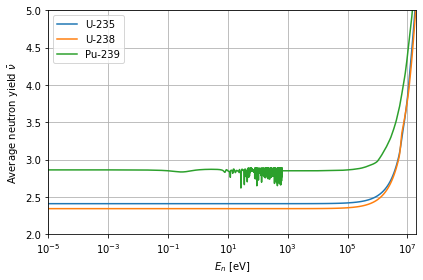

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

h5_files_path = "/Users/sigge/jeff-3.3-hdf5"

fig = plt.figure()
ax = fig.gca()

TEMPERATURE = 900 # K

# x_logspace = np.logspace(np.log10(1e-5), np.log10(2e7), 1000)

for nuclide_label in ['U-235', 'U-238', 'Pu-239']:
    nuclide = nuclide_label.replace('-', '')

    h5_filename = f"{h5_files_path}/{nuclide}.h5"

    h5file = h5py.File(h5_filename, 'r')
    # energy_group = h5file[f'U235/energy/{TEMPERATURE}K']
    reactions_group = h5file[f'{nuclide}/reactions']
    # for name, obj in sorted(list(main_group.items()))[:10]:
    #     if 'reaction_' in name:
    #         print('{}, {}'.format(name, obj.attrs['label'].decode()))

    n_yield = reactions_group[f'reaction_018/product_0/yield']
    # print(list(n_elastic_group.values()))

    # Extract the yield and energy data
    energy = n_yield[0,:]
    yield_ = n_yield[1,:]

    plt.semilogx(energy, yield_, label=nuclide_label)

plt.xlabel('$E_n$ [eV]')
plt.ylabel(r'Average neutron yield $\bar{\nu}$')
plt.grid()
plt.legend()
plt.xlim(1e-5, 2e7)
plt.ylim(2, 5)
plt.tight_layout()

plt.savefig("neutron_yields.pdf")

image_to_thesis.save(plt, image_to_thesis.ThesisSection.THEORY, "neutron_yields.pdf")

plt.show()